In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import sys
import argparse as argp

In [4]:
all_dat = pd.read_csv('/Users/leg2015/workspace/Aagos/Data/Mut_Rate_CleanedDataStatFit.csv', index_col="update", float_precision="high")
# all_dat_rep = pd.read_csv('/Users/leg2015/workspace/Aagos/Data/Mut_rate_FINAL_CleanedDataStatFitRep.csv', index_col="update", float_precision="high")
# all_dat_0 = pd.read_csv('/Users/leg2015/workspace/Aagos/NO_MUT/CleanedDataStatFit.csv', index_col="update", float_precision="high")
# hist_test = pd.read_csv('/Users/leg2015/workspace/Aagos/Histogram_Test/m_.001_f_.003_c_.03/0/gene_stats.csv', index_col='update')
# all_dat

In [5]:
max_gen_data = all_dat.loc[49000]
early_gen_data = all_dat.loc[10000]
# max_gen_rep_data = all_dat_rep.loc[49000]
# early_gen_rep_data = all_dat_rep.loc[10000]
# gen1000_data = all_dat.loc[1000]
# max_gen_rep_data.to_csv("max_gen_everything.csv")
# max_gen_0 = all_dat_0.loc[49000]
# early_gen_0 = all_dat_0.loc[10000]

In [12]:
# for i in range(len(max_gen_data.index)):
#     max_gen_data.loc['gene_length'] = max_gen_data.iloc[i].mean_Multi_Gene_Sites + max_gen_data.iloc[i].mean_Neutral_Sites + max_gen_data.iloc[i].mean_One_Gene_Sites
#     max_gen_data.loc['coding_sites'] = max_gen_data.iloc[i].mean_Multi_Gene_Sites + max_gen_data.iloc[i].mean_One_Gene_Sites
# #     print("adding to max")
#     # max_gen_gene_len
# for i in range(len(early_gen_data.index)):
#     early_gen_data.loc['gene_length'] = early_gen_data.iloc[i].mean_Multi_Gene_Sites + early_gen_data.iloc[i].mean_Neutral_Sites + early_gen_data.iloc[i].mean_One_Gene_Sites
# #     early_gen_data.loc['coding_sites'] = early_gen_data.iloc[i].mean_Multi_Gene_Sites + early_gen_data.iloc[i].mean_One_Gene_Sites

# max_gen_data['max_gene_length'] = max_gen_data.max_Multi_Gene_Sites + max_gen_data.max_Neutral_Sites + max_gen_data.max_One_Gene_Sites
# max_gen_data['max_coding_sites'] = max_gen_data.max_Multi_Gene_Sites + max_gen_data.max_One_Gene_Sites

# early_gen_data['mean_gene_length'] = early_gen_data.mean_Multi_Gene_Sites + early_gen_data.mean_Neutral_Sites + early_gen_data.mean_One_Gene_Sites
# early_gen_data['mean_coding_sites'] = early_gen_data.mean_Multi_Gene_Sites + early_gen_data.mean_One_Gene_Sites

# gen1000_data['max_gene_length'] = gen1000_data.max_Multi_Gene_Sites + gen1000_data.max_Neutral_Sites + gen1000_data.max_One_Gene_Sites
# gen1000_data['max_coding_sites'] = gen1000_data.max_Multi_Gene_Sites + gen1000_data.max_One_Gene_Sites

# # gen_1000
    
print(max_gen_data.columns)
# print(early_gen_data.columns)

Index(['c', 'f', 'inferiority', 'm', 'max_coding_sites', 'max_fitness',
       'max_gene_length', 'max_multi_gene_sites', 'max_neighbor_genes',
       'max_neutral_sites', 'max_one_gene_sites', 'max_overlap',
       'mean_coding_sites', 'mean_fitness', 'mean_gene_length',
       'mean_multi_gene_sites', 'mean_neighbor_genes', 'mean_neutral_sites',
       'mean_one_gene_sites', 'mean_overlap', 'min_coding_sites',
       'min_fitness', 'min_gene_length', 'min_multi_gene_sites',
       'min_neighbor_genes', 'min_neutral_sites', 'min_one_gene_sites',
       'min_overlap', 'replicate', 'variance_coding_sites',
       'variance_gene_length', 'variance_multi_gene_sites',
       'variance_neighbor_genes', 'variance_neutral_sites',
       'variance_one_gene_sites', 'variance_overlap'],
      dtype='object')


In [18]:
max_gen_fitness = max_gen_data.loc[:,[ 'max_fitness', 'c', 'm', 'f', 'replicate']]
max_gen_gene_len = max_gen_data.loc[:, ['max_gene_length', 'c', 'm', 'f', 'replicate']]
max_gen_overlap = max_gen_data.loc[:,[ 'max_overlap', 'c', 'm', 'f', 'replicate']]
max_gen_coding = max_gen_data.loc[:,[ 'max_coding_sites', 'c', 'm', 'f', 'replicate']]
max_gen_neutral = max_gen_data.loc[:,[ 'max_neutral_sites', 'c', 'm', 'f', 'replicate']]
max_gen_neighbor = max_gen_data.loc[:,[ 'max_neighbor_genes', 'c', 'm', 'f', 'replicate']]

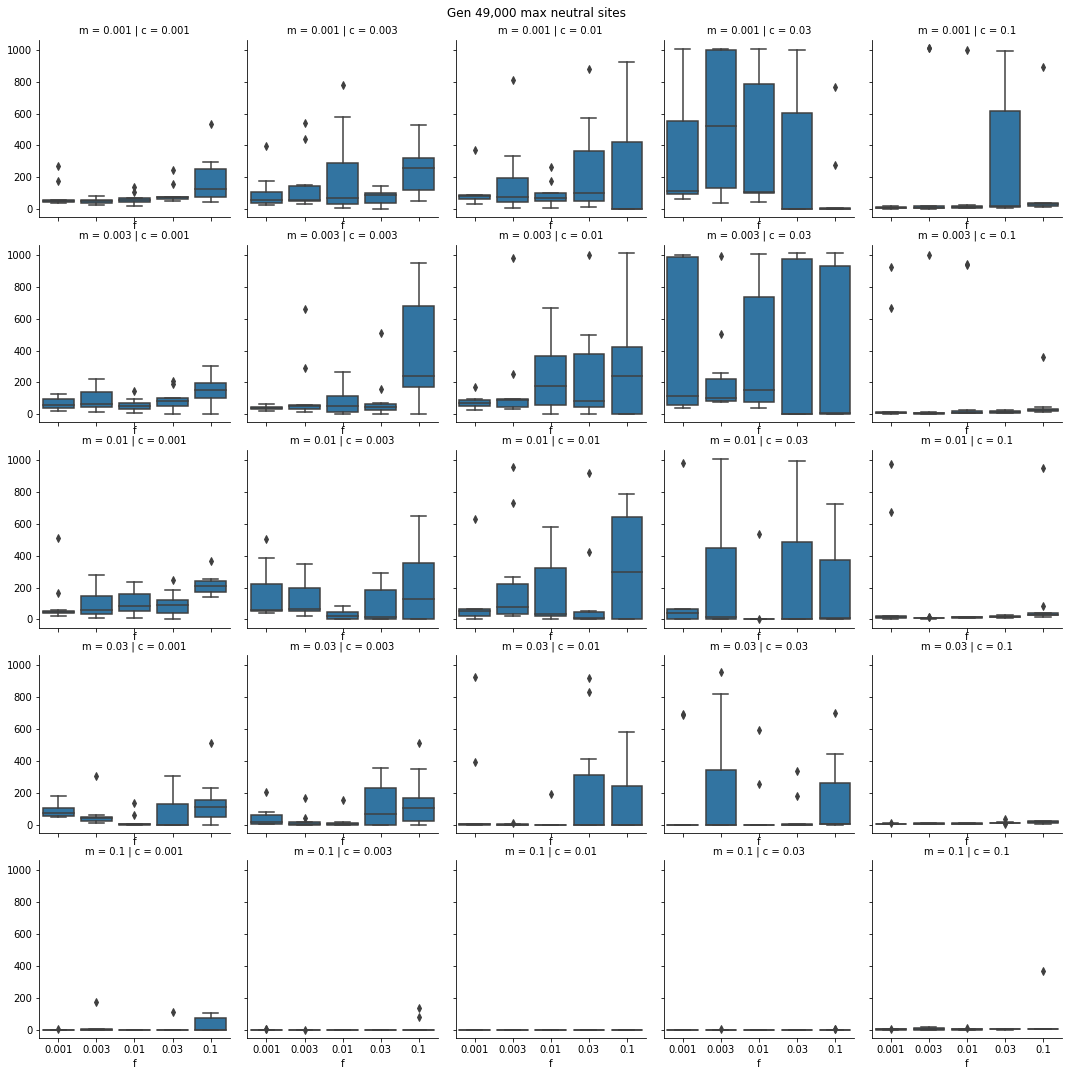

In [20]:
facet = sns.FacetGrid(max_gen_neutral, col="c", row="m",)
facet.map_dataframe(sns.boxplot, x="f", y="max_neutral_sites")
for axis in facet.axes.flat:
    axis.set_xlabel("f")
plt.subplots_adjust(top=0.95)
facet.fig.suptitle('Gen 49,000 max neutral sites') # can also get
facet.savefig("mut_max_neutral.pdf")
# TODO: figure early_gen_neighbor how to save pdfs to figure directory
# also way so don't have to boilerplate would be nice

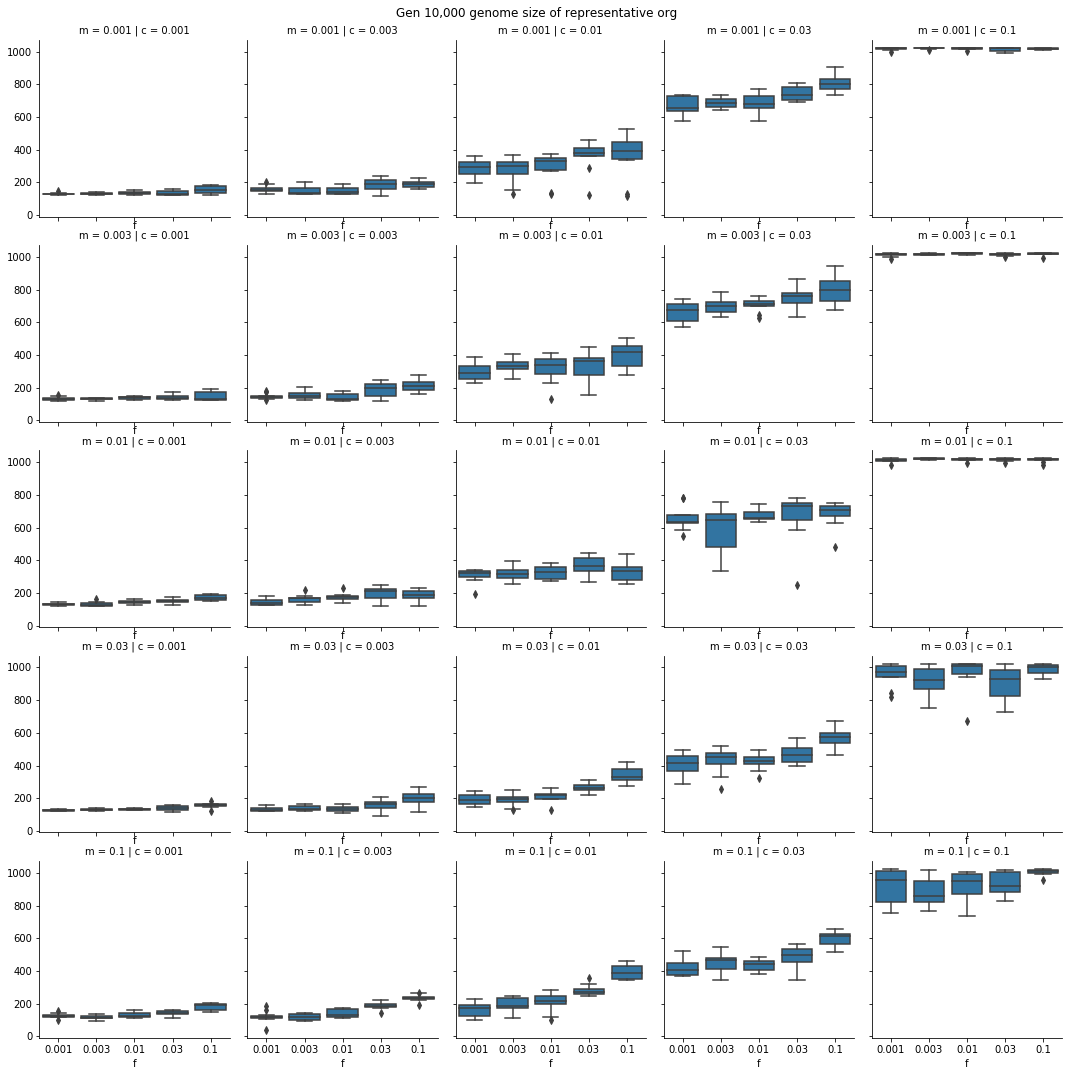

In [32]:
facet = sns.FacetGrid(early_gen_rep_gene_len, col="c", row="m",)
facet.map_dataframe(sns.boxplot, x="f", y="genome_size")
for axis in facet.axes.flat:
    axis.set_xlabel("f")
plt.subplots_adjust(top=0.95)
facet.fig.suptitle('Gen 10,000 genome size of representative org') # can also get
facet.savefig("early_gen_rep_gene_len.pdf")

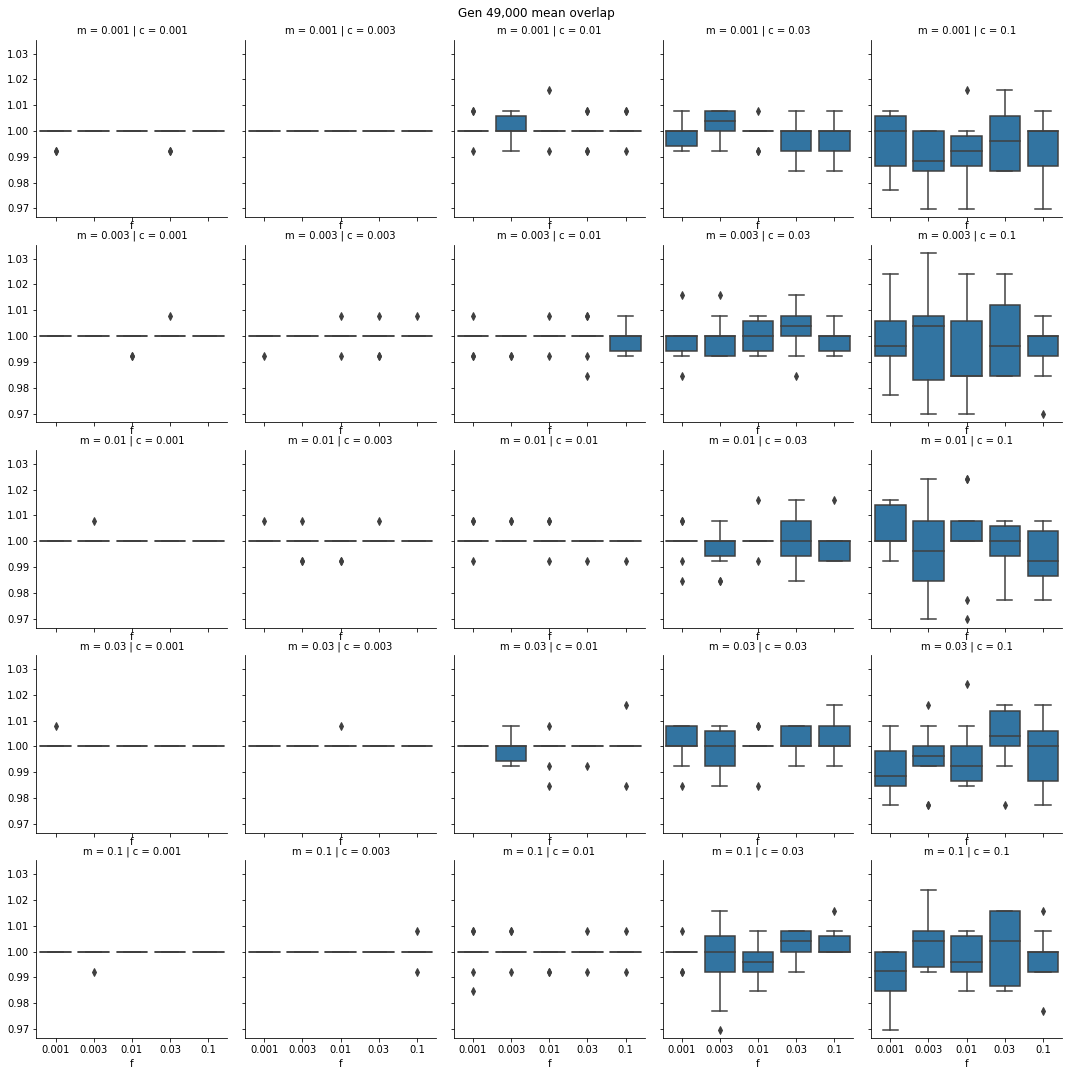

In [19]:
facet = sns.FacetGrid(max_gen_overlap, col="c", row="m",)
facet.map_dataframe(sns.boxplot, x="f", y="mean_Overlap")
for axis in facet.axes.flat:
    axis.set_xlabel("f")
plt.subplots_adjust(top=0.95)
facet.fig.suptitle('Gen 49,000 mean overlap') # can also get
facet.savefig("max_gen_mean_overlap.pdf")

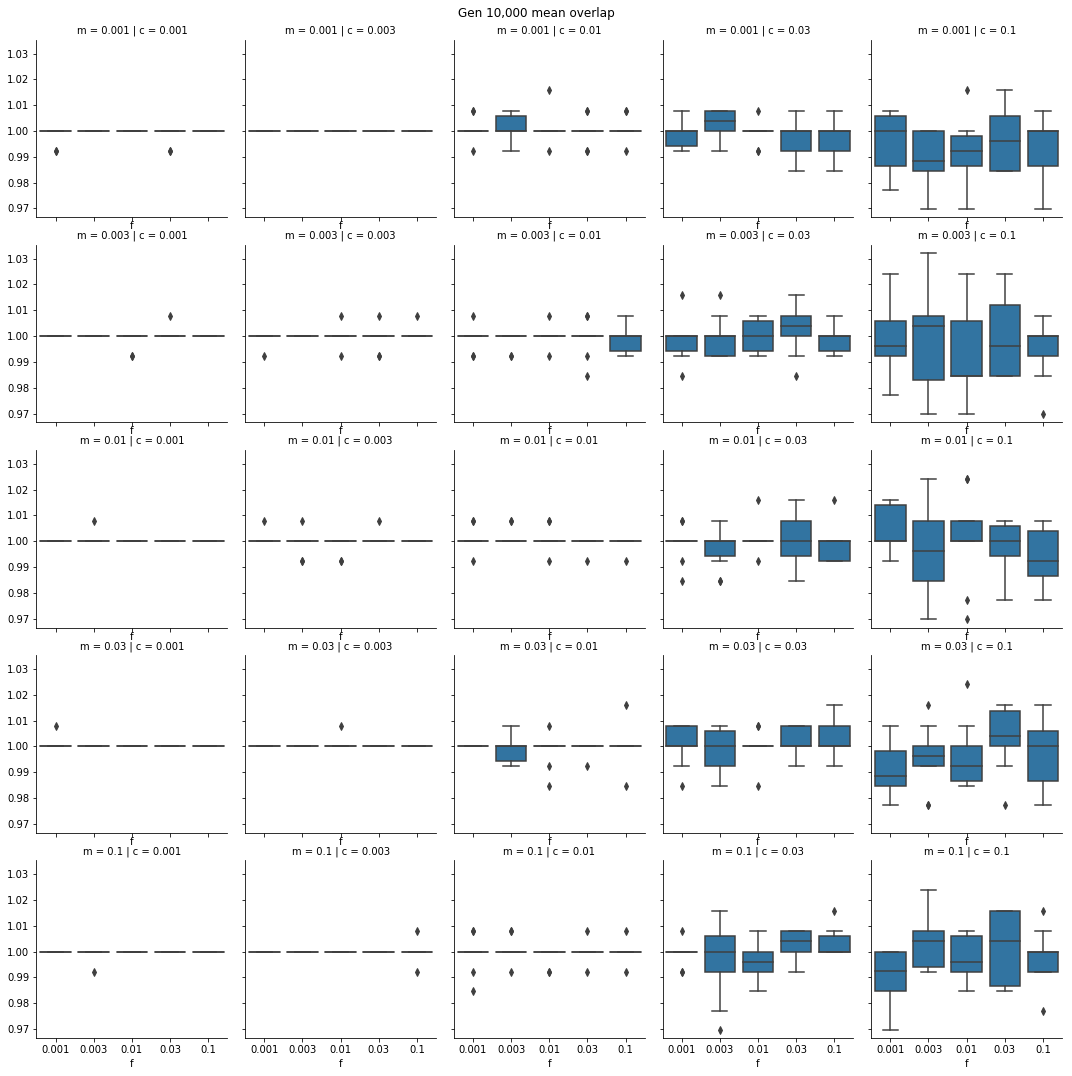

In [20]:
facet = sns.FacetGrid(early_gen_overlap, col="c", row="m",)
facet.map_dataframe(sns.boxplot, x="f", y="mean_Overlap")
for axis in facet.axes.flat:
    axis.set_xlabel("f")
plt.subplots_adjust(top=0.95)
facet.fig.suptitle('Gen 10,000 mean overlap') # can also get
facet.savefig("early_gen_mean_overlap.pdf")

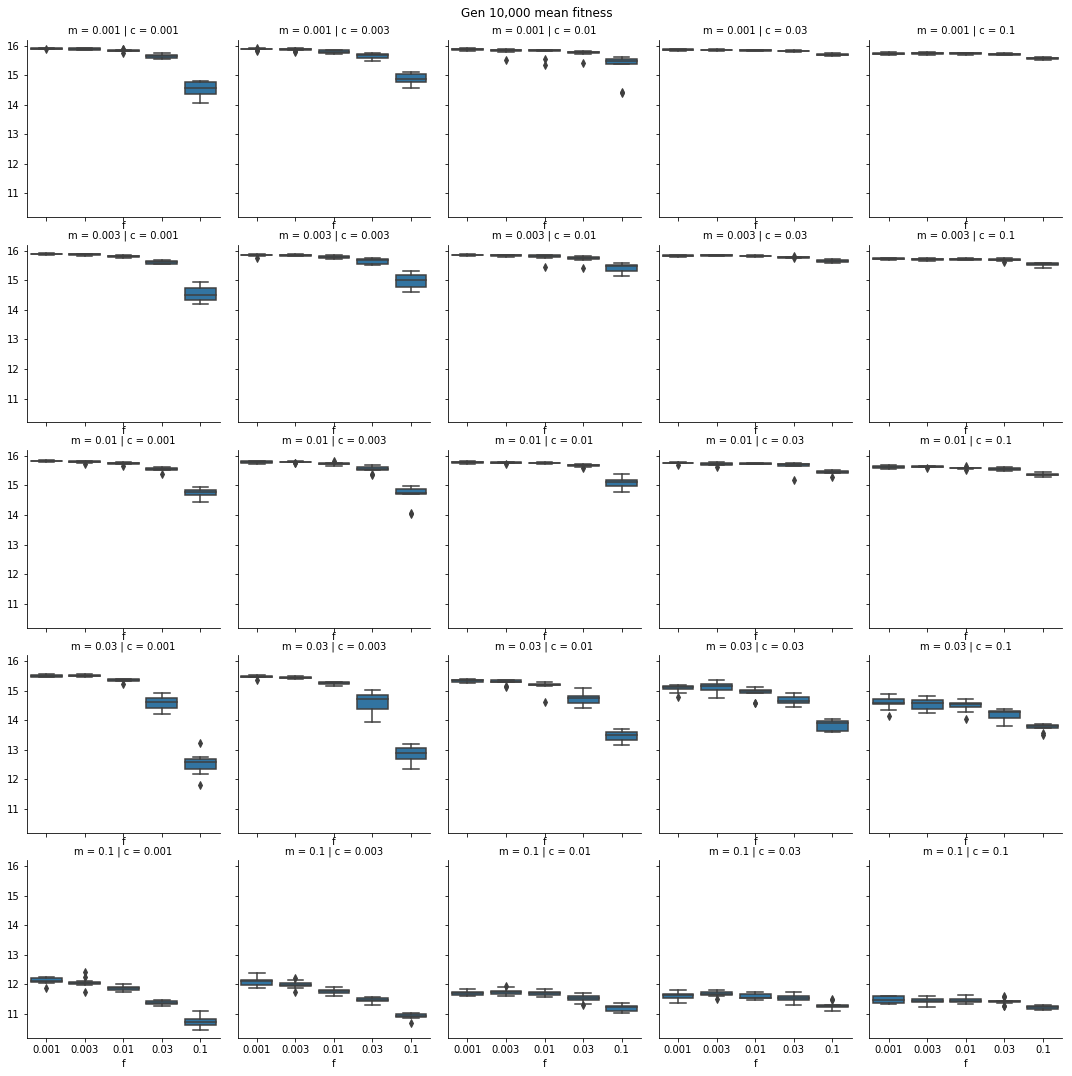

In [21]:
facet = sns.FacetGrid(early_gen_fitness, col="c", row="m",)
facet.map_dataframe(sns.boxplot, x="f", y="mean_fitness")
for axis in facet.axes.flat:
    axis.set_xlabel("f")
plt.subplots_adjust(top=0.95)
facet.fig.suptitle('Gen 10,000 mean fitness') # can also get
facet.savefig("early_gen_mean_fitness.pdf")

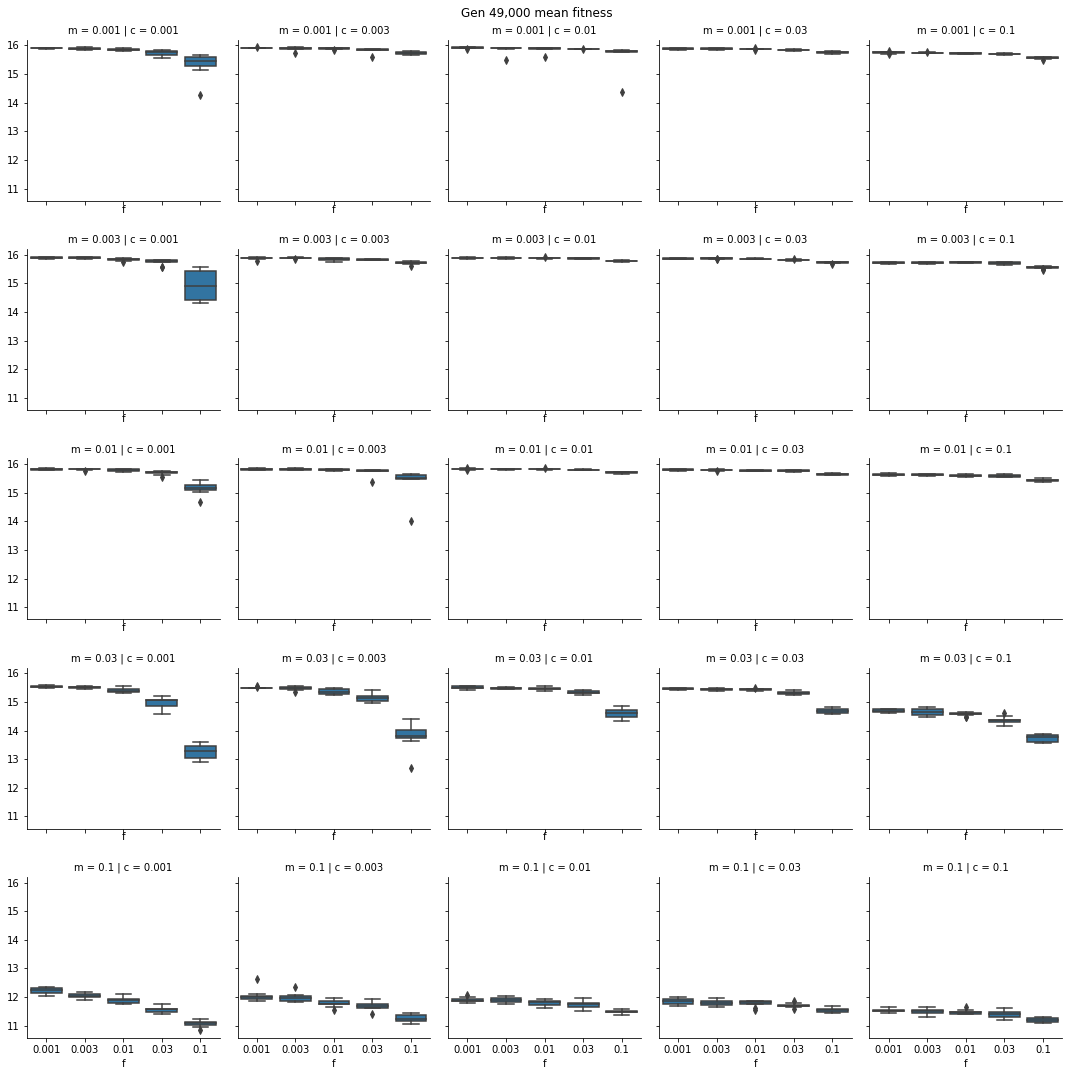

In [22]:
facet = sns.FacetGrid(max_gen_fitness, col="c", row="m",)
facet.map_dataframe(sns.boxplot, x="f", y="mean_fitness")

# for plot in plt.subplots():
#     print(plot.AxesSubplot)
# print(facet.axes[4,0].get_yticklabels())
# print(facet.axes[4,0].get_xticklabels())
# print("\n")
# labels = ["meme1", "meme2"]
for axis in facet.axes.flat:
#     locs, labels = axis.xticks()
#     axis.set_yticklabels(labels)
    axis.set_xlabel("f")
#     _ = plt.setp(axis.get_yticklabels(), visible=True)
#     _ = plt.setp(axis.get_xticklabels(), visible=True)
#     axis.set_yticklabels(axis.get_yticklabels(), visible=True)
#     print(axis.get_xticklabels())
#     axis.set_xticklabels(axis.get_xticklabels(), visible=True)
#     axis.set_yticklabels(facet.axes[4,0].get_yticklabels(), visible=True)
#     axis.set_xticklabels(facet.axes[4,0].get_xticklabels(), visible=True)
plt.subplots_adjust(hspace=0.3)

# yticklabels = facet.axes[4,0].get_yticklabels()
# xticklabels = facet.axes[4,0].get_xticklabels()
# meme = []
# mema = []
# for ax in facet.axes[-1,:]:
#     xlabel = ax.get_xticklabels()
#     print("x lab ", xlabel)
#     meme.append(xlabel)
    
# for ax in facet.axes[:,0]:
#     ylabel = ax.get_xticklabels()
#     print("y lab", ylabel)
#     mema.append(ylabel)

# for i in range(len(meme)):
#     for j in range(len(mema)):
#         facet.axes[j,i].set_xticklabels("meme")
#         facet.axes[j,i].set_yticklabels("mema")


# for ax in facet.axes:
#     _ = plt.setp(ax.get_yticklabels(), visible=True)
#     _ = plt.setp(ax.get_xticklabels(), visible=True)

    
# for ax in facet.axes:
    

# plt.show()
plt.subplots_adjust(top=0.95)
facet.fig.suptitle('Gen 49,000 mean fitness') # can also get
facet.savefig("max_gen_mean_fitness.pdf")

In [ ]:
facet = sns.FacetGrid(max_gen_fitness, col="c", row="m",)
facet.map_dataframe(sns.boxplot, x="f", y="mean_fitness")

# for plot in plt.subplots():
#     print(plot.AxesSubplot)
# print(facet.axes[4,0].get_yticklabels())
# print(facet.axes[4,0].get_xticklabels())
# print("\n")
# labels = ["meme1", "meme2"]
for axis in facet.axes.flat:
#     locs, labels = axis.xticks()
#     axis.set_yticklabels(labels)
    axis.set_xlabel("f")
#     _ = plt.setp(axis.get_yticklabels(), visible=True)
#     _ = plt.setp(axis.get_xticklabels(), visible=True)
#     axis.set_yticklabels(axis.get_yticklabels(), visible=True)
#     print(axis.get_xticklabels())
#     axis.set_xticklabels(axis.get_xticklabels(), visible=True)
#     axis.set_yticklabels(facet.axes[4,0].get_yticklabels(), visible=True)
#     axis.set_xticklabels(facet.axes[4,0].get_xticklabels(), visible=True)
plt.subplots_adjust(hspace=0.3)

# yticklabels = facet.axes[4,0].get_yticklabels()
# xticklabels = facet.axes[4,0].get_xticklabels()
# meme = []
# mema = []
# for ax in facet.axes[-1,:]:
#     xlabel = ax.get_xticklabels()
#     print("x lab ", xlabel)
#     meme.append(xlabel)
    
# for ax in facet.axes[:,0]:
#     ylabel = ax.get_xticklabels()
#     print("y lab", ylabel)
#     mema.append(ylabel)

# for i in range(len(meme)):
#     for j in range(len(mema)):
#         facet.axes[j,i].set_xticklabels("meme")
#         facet.axes[j,i].set_yticklabels("mema")


# for ax in facet.axes:
#     _ = plt.setp(ax.get_yticklabels(), visible=True)
#     _ = plt.setp(ax.get_xticklabels(), visible=True)

    
# for ax in facet.axes:
    

plt.show()
facet.savefig("max_gen__mean_fitness.pdf")

In [ ]:
for curr in group:
        plt.scatter((curr[1].m + curr[1].f + curr[1].c), curr[1].mean_fitness)
plt.show()

In [ ]:
playData = max_gen_fitness.iloc[0:5]
playData

In [ ]:
memes = max_gen_fitness.iloc[20:25]
memes

In [ ]:
plt.boxplot(playData.mean_fitness)
plt.show()

In [ ]:
# plt.boxplot(playData.mean_fitness)
# plt.boxplot(memes.mean_fitness)
superData = [playData.mean_fitness, memes.mean_fitness]
plt.boxplot(superData)
plt.show()